# 🆚 일반 딥러닝 vs CNN 성능 비교 실습
## CIFAR-10 컬러 이미지 분류를 통한 모델 비교

## 📋 학습 목표
이 노트북에서는 다음 내용을 학습하고 비교합니다:
- CIFAR-10 컬러 이미지 데이터셋 이해하기
- 일반 신경망(Dense layers)과 CNN의 구조적 차이
- 동일한 데이터에 대한 두 모델의 성능 비교
- 컬러 이미지 처리에서 CNN의 우수성 확인
- 모델별 특징과 장단점 분석

## 📚 목차
1. **라이브러리 임포트 및 환경 설정**
2. **CIFAR-10 데이터셋 탐색**
3. **컬러 이미지 시각화**
4. **모델 1: 일반 신경망 (Dense Layers)**
5. **모델 2: 합성곱 신경망 (CNN)**
6. **성능 비교 및 분석**
7. **결론 및 개선 방안**

---

## 🎯 비교 실습의 핵심 질문

1. **구조적 차이**: Dense vs Conv2D 층의 차이점은?
2. **매개변수 수**: 어느 모델이 더 효율적인가?
3. **성능 차이**: 정확도와 학습 속도는?
4. **일반화 능력**: 과대적합은 어느 모델에서 더 발생하는가?
5. **실용성**: 실제 컴퓨터 비전 프로젝트에 적합한 모델은?

---

## 💡 CIFAR-10 데이터셋 소개

**CIFAR-10**은 컴퓨터 비전 연구에서 널리 사용되는 벤치마크 데이터셋입니다.

### 데이터셋 특징:
- **이미지 크기**: 32×32 픽셀 (컬러)
- **채널 수**: 3개 (RGB)
- **클래스 수**: 10개
- **훈련 데이터**: 50,000개
- **테스트 데이터**: 10,000개

### 10개 클래스:
0. 비행기 (airplane)
1. 자동차 (automobile)  
2. 새 (bird)
3. 고양이 (cat)
4. 사슴 (deer)
5. 개 (dog)
6. 개구리 (frog)
7. 말 (horse)
8. 배 (ship)
9. 트럭 (truck)


## 1. 📦 라이브러리 임포트 및 환경 설정

딥러닝 모델 비교 실습에 필요한 라이브러리들을 임포트합니다.


In [1]:
# 🔧 필수 라이브러리 임포트
import tensorflow as tf  # type: ignore
import keras  # type: ignore
from keras.datasets import cifar10  # type: ignore
from keras import models, layers  # type: ignore
from keras.utils import to_categorical  # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import time
from datetime import datetime

# 시각화 설정
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [12, 8]

# 텐서플로우 및 케라스 버전 확인
print(f"🔍 TensorFlow 버전: {tf.__version__}")
print(f"🔍 Keras 버전: {keras.__version__}")

# GPU 사용 가능 여부 확인 및 설정
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # GPU 메모리 증가 허용 설정
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✅ GPU 사용 가능: {len(gpus)}개")
        for i, gpu in enumerate(gpus):
            print(f"   GPU {i}: {gpu.name}")
        print("🔧 GPU 메모리 증가 허용 설정 완료")
    except RuntimeError as e:
        print(f"⚠️ GPU 설정 중 오류 발생: {e}")
        print("💡 프로그램 시작 시에만 GPU 설정 가능")
else:
    print("⚠️ CPU만 사용 가능")

# 재현 가능한 결과를 위한 시드 설정
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# 전역 변수 설정
NUM_CLASSES = 10
IMG_HEIGHT = 32
IMG_WIDTH = 32
IMG_CHANNELS = 3

print(f"\n🎯 실험 설정:")
print(f"   이미지 크기: {IMG_HEIGHT}×{IMG_WIDTH}×{IMG_CHANNELS}")
print(f"   클래스 수: {NUM_CLASSES}")
print(f"   시드 값: {SEED}")
print("\n✅ 환경 설정 완료!")


🔍 TensorFlow 버전: 2.19.0
🔍 Keras 버전: 3.10.0
⚠️ CPU만 사용 가능

🎯 실험 설정:
   이미지 크기: 32×32×3
   클래스 수: 10
   시드 값: 42

✅ 환경 설정 완료!


## 2. 🗂️ CIFAR-10 데이터셋 탐색

CIFAR-10 데이터셋을 로드하고 기본 구조를 파악해보겠습니다.


In [2]:
# 📁 CIFAR-10 데이터셋 로드
print("📁 CIFAR-10 데이터셋 로드 중...")

# 데이터셋 로드 (자동으로 다운로드됨)
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = cifar10.load_data()

print("✅ 데이터 로드 완료!")

# 📊 데이터 형태 확인
print("\n📊 데이터셋 구조:")
print(f"📈 훈련 이미지 형태: {X_train_raw.shape}")
print(f"📈 훈련 레이블 형태: {y_train_raw.shape}")
print(f"📈 테스트 이미지 형태: {X_test_raw.shape}")
print(f"📈 테스트 레이블 형태: {y_test_raw.shape}")

# 🔍 데이터 상세 정보
print(f"\n🔍 데이터 상세 정보:")
print(f"📦 훈련 샘플 수: {X_train_raw.shape[0]:,}개")
print(f"📦 테스트 샘플 수: {X_test_raw.shape[0]:,}개")
print(f"🖼️ 이미지 크기: {X_train_raw.shape[1]}×{X_train_raw.shape[2]}×{X_train_raw.shape[3]}")
print(f"🎨 픽셀 값 범위: {X_train_raw.min()} ~ {X_train_raw.max()}")
print(f"🏷️ 레이블 형태: {y_train_raw.dtype}")
print(f"🔢 고유 클래스 수: {len(np.unique(y_train_raw))}")

# 클래스별 샘플 수 확인
unique_labels, counts = np.unique(y_train_raw, return_counts=True)
print(f"\n📊 클래스별 훈련 샘플 수:")
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

for label, count, name in zip(unique_labels, counts, class_names):
    print(f"   {label}: {name:12s} - {count:,}개")

print(f"\n💾 전체 데이터 크기 (추정):")
train_size_mb = (X_train_raw.nbytes + y_train_raw.nbytes) / (1024**2)
test_size_mb = (X_test_raw.nbytes + y_test_raw.nbytes) / (1024**2)
total_size_mb = train_size_mb + test_size_mb

print(f"   훈련 데이터: {train_size_mb:.1f} MB")
print(f"   테스트 데이터: {test_size_mb:.1f} MB")
print(f"   전체 크기: {total_size_mb:.1f} MB")


📁 CIFAR-10 데이터셋 로드 중...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 220s 1us/step
✅ 데이터 로드 완료!

📊 데이터셋 구조:
📈 훈련 이미지 형태: (50000, 32, 32, 3)
📈 훈련 레이블 형태: (50000, 1)
📈 테스트 이미지 형태: (10000, 32, 32, 3)
📈 테스트 레이블 형태: (10000, 1)

🔍 데이터 상세 정보:
📦 훈련 샘플 수: 50,000개
📦 테스트 샘플 수: 10,000개
🖼️ 이미지 크기: 32×32×3
🎨 픽셀 값 범위: 0 ~ 255
🏷️ 레이블 형태: uint8
🔢 고유 클래스 수: 10

📊 클래스별 훈련 샘플 수:
   0: airplane     - 5,000개
   1: automobile   - 5,000개
   2: bird         - 5,000개
   3: cat          - 5,000개
   4: deer         - 5,000개
   5: dog          - 5,000개
   6: frog         - 5,000개
   7: horse        - 5,000개
   8: ship         - 5,000개
   9: truck        - 5,000개

💾 전체 데이터 크기 (추정):
   훈련 데이터: 146.5 MB
   테스트 데이터: 29.3 MB
   전체 크기: 175.8 MB


## 3. 🖼️ 컬러 이미지 시각화

CIFAR-10의 컬러 이미지들을 시각화하여 데이터의 특성을 파악해보겠습니다.


🖼️ CIFAR-10 이미지 시각화:
\n1️⃣ 첫 번째 훈련 이미지:


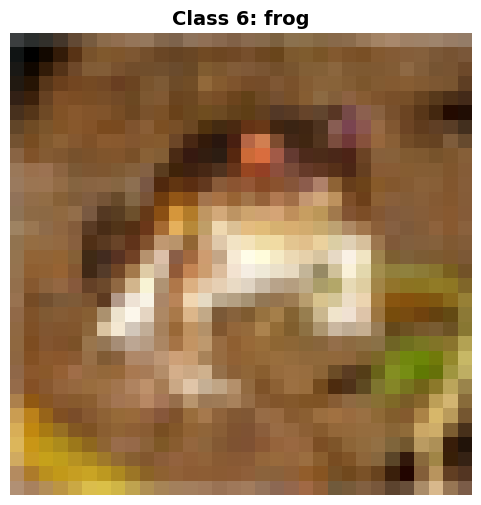

\n2️⃣ 무작위 25개 이미지 격자:


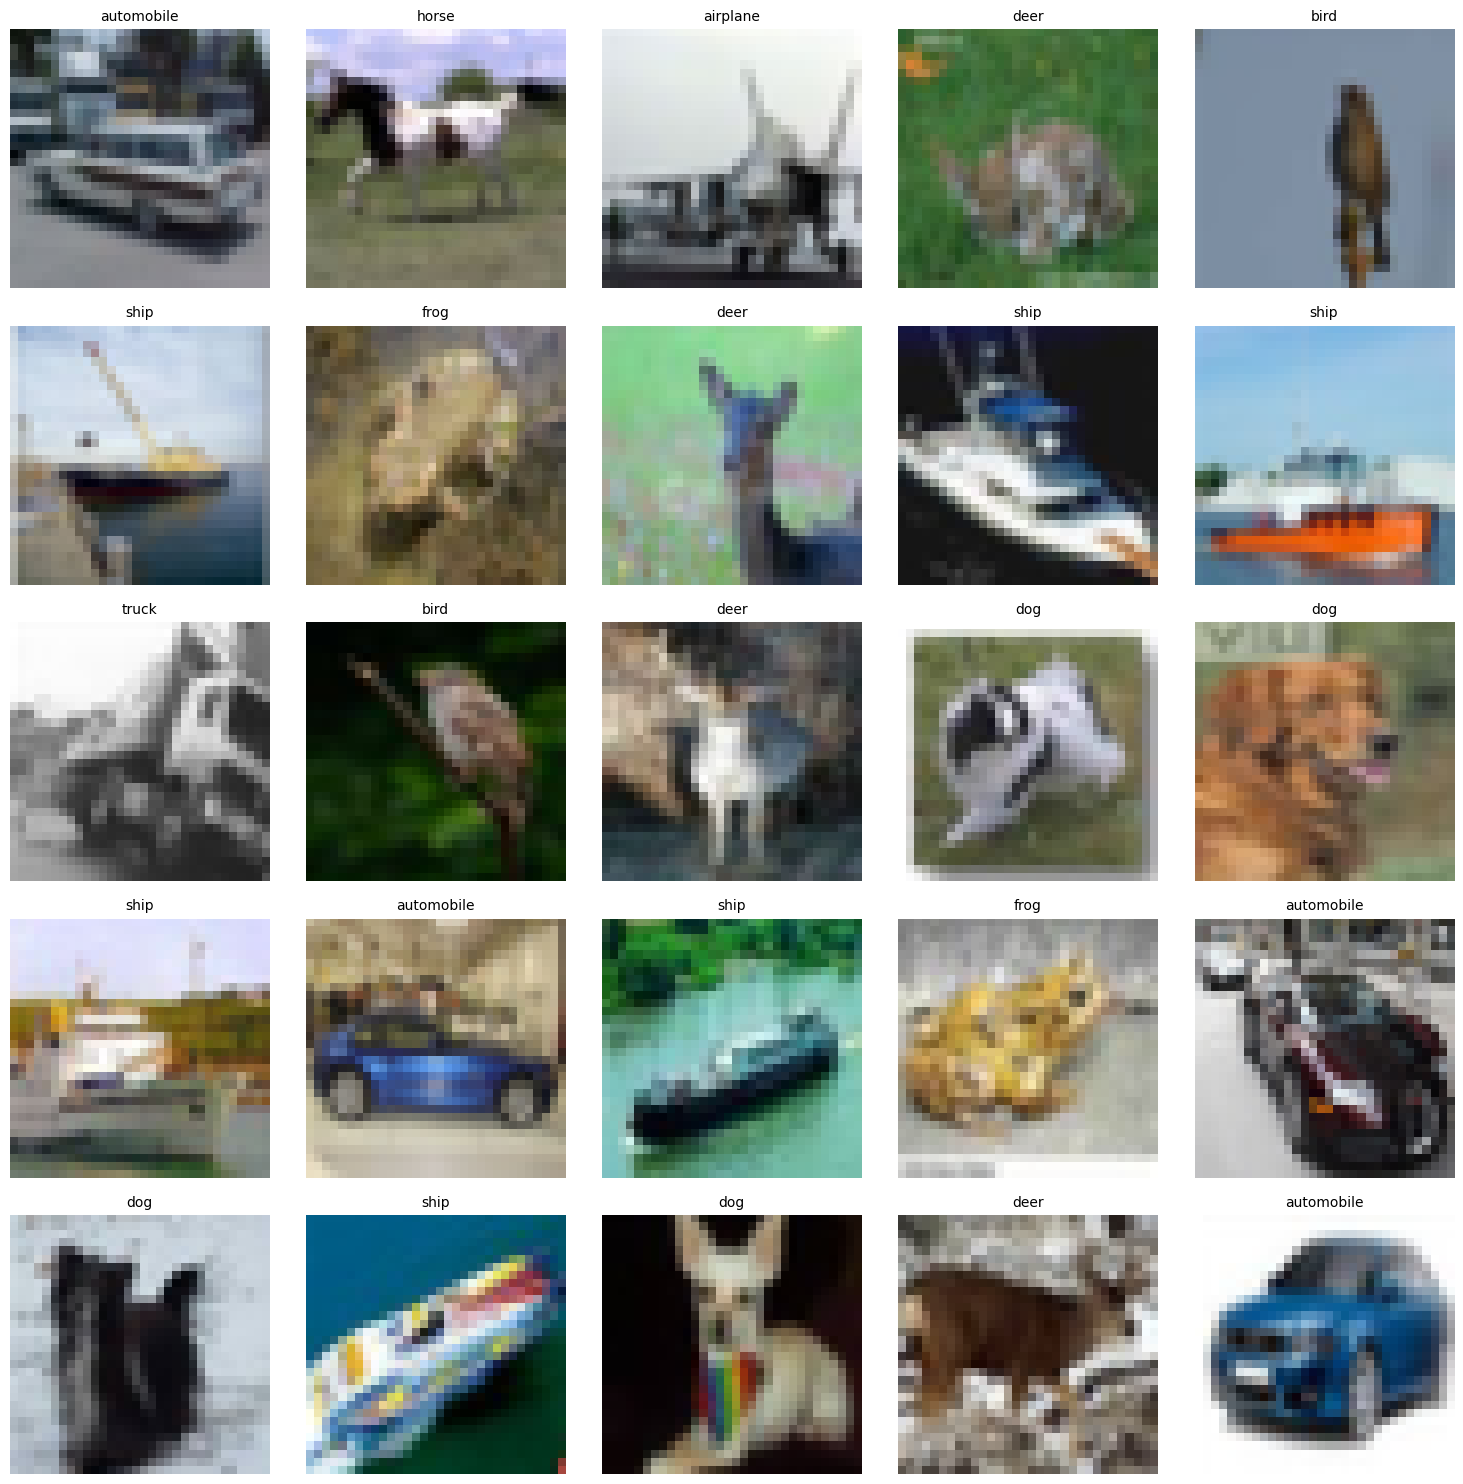

\n3️⃣ 각 클래스별 샘플 이미지 (클래스당 5개):


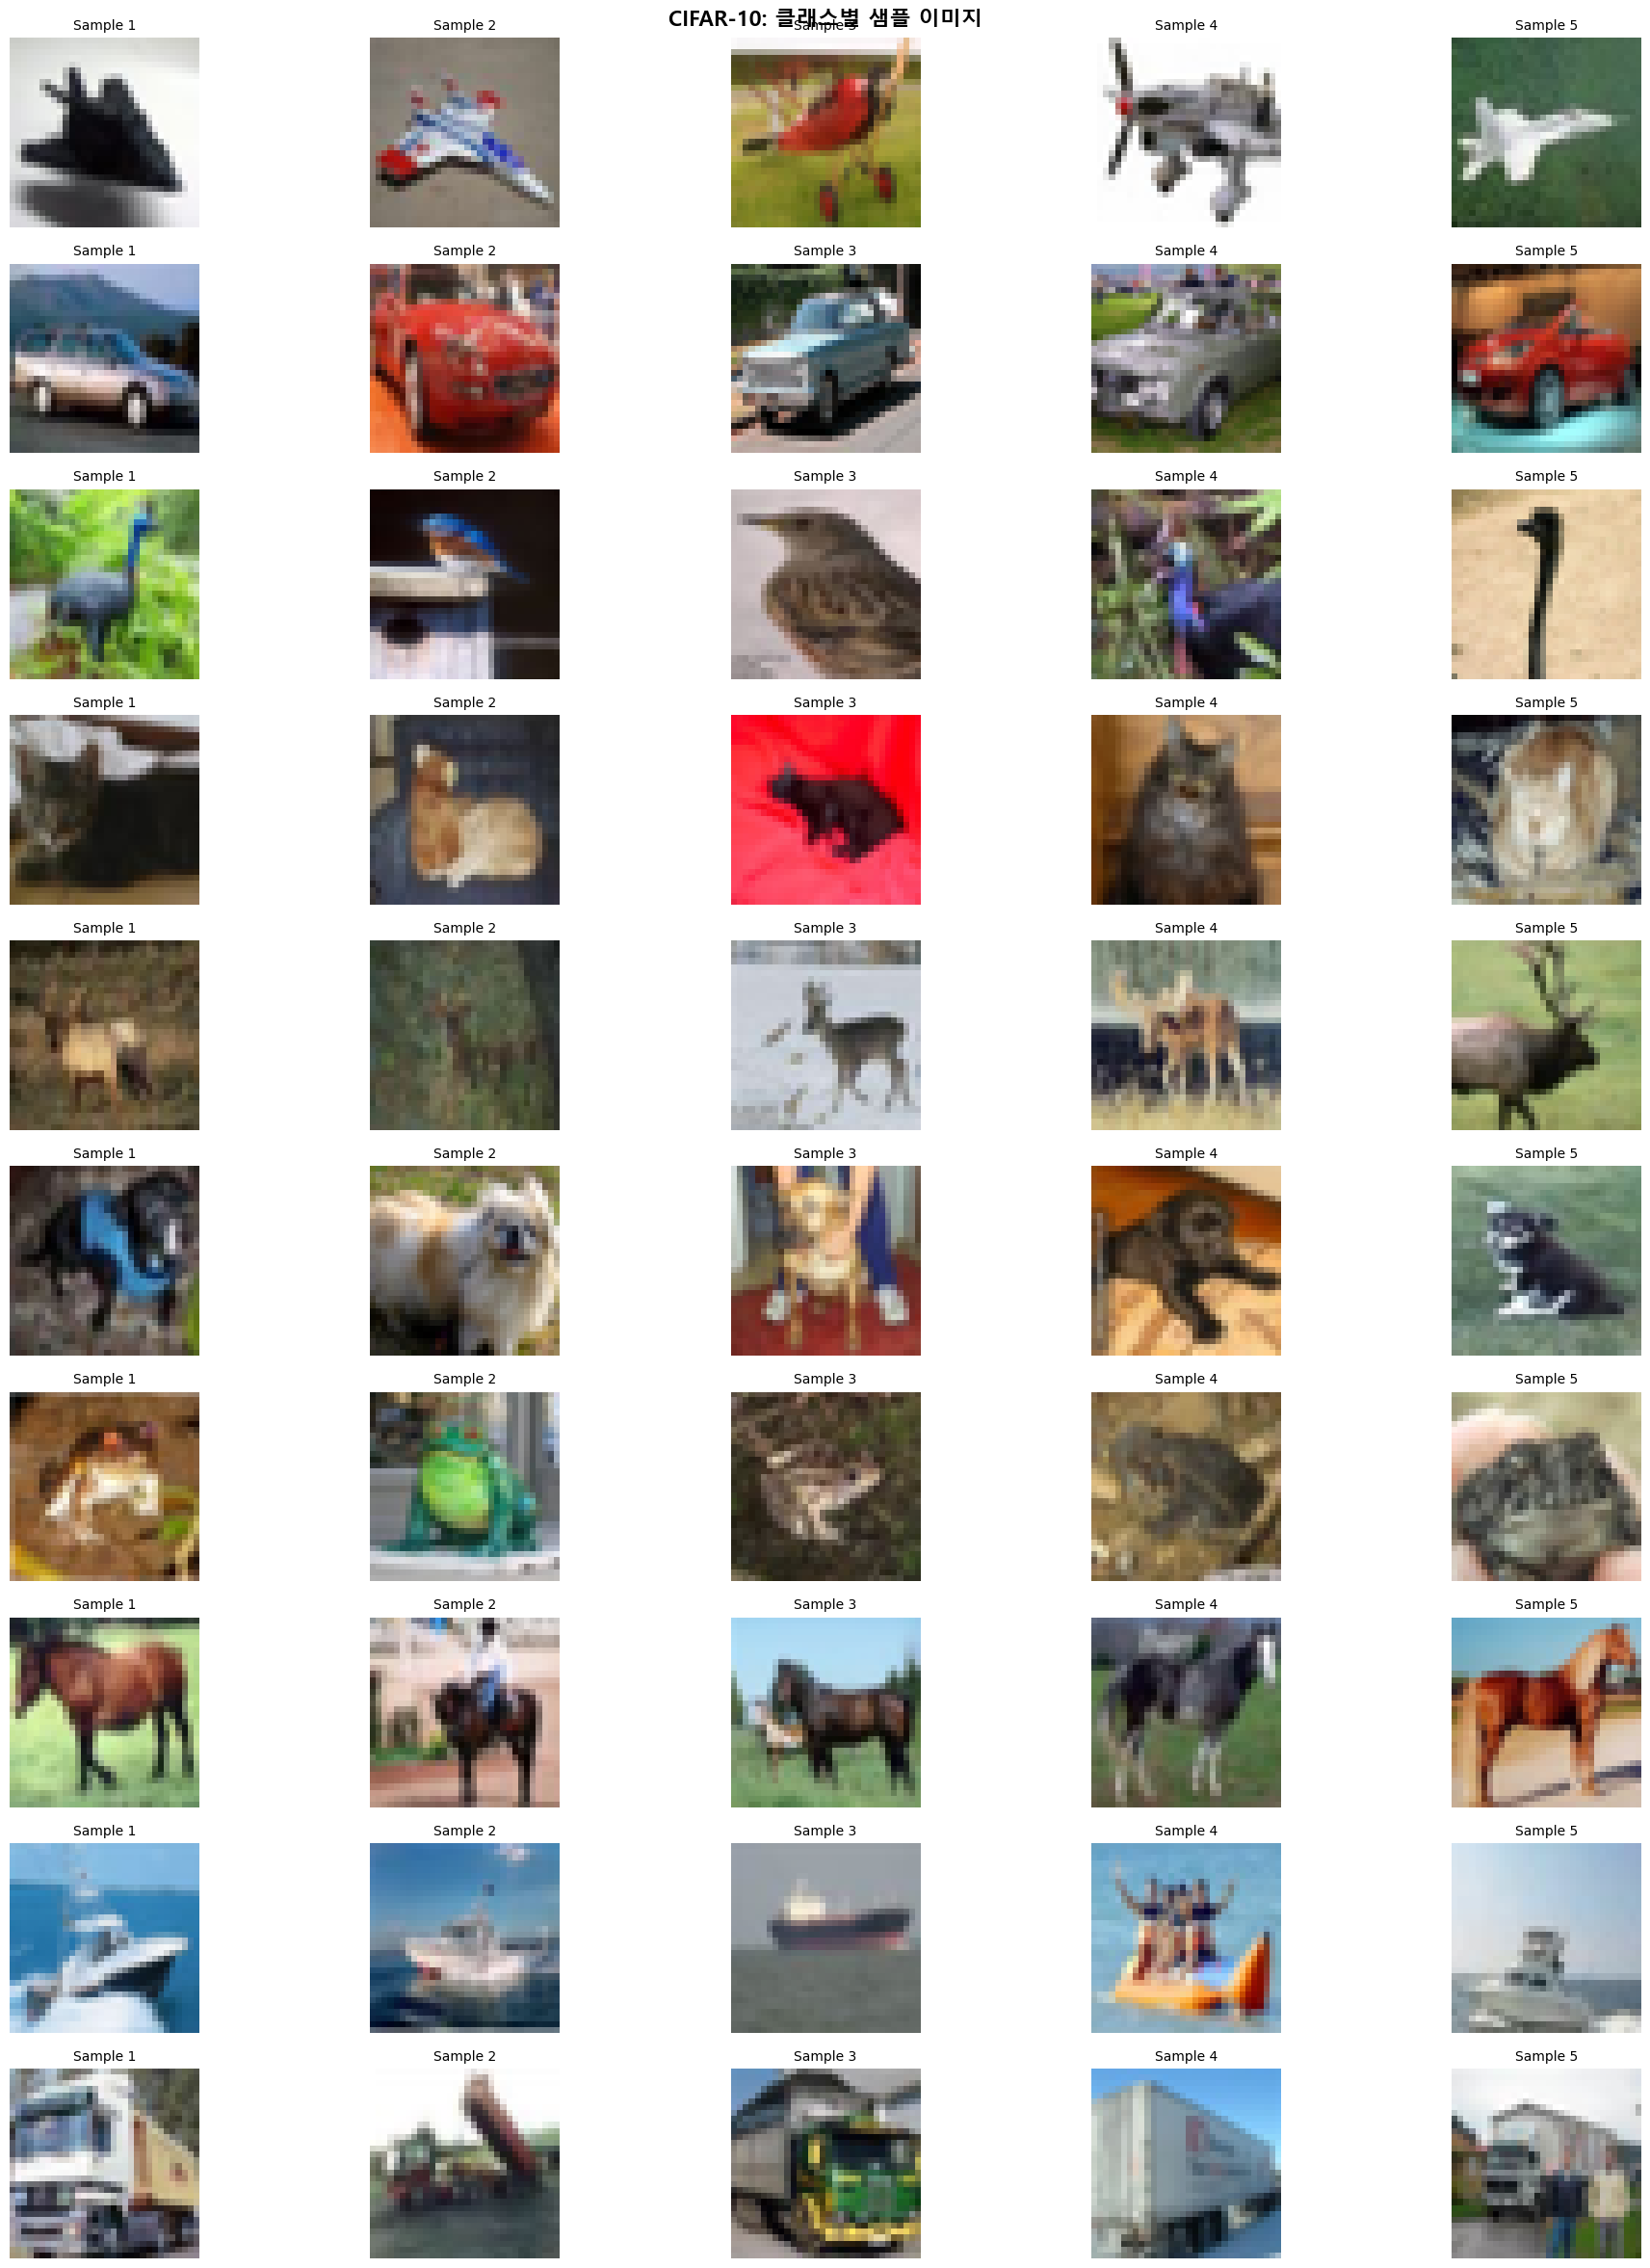

In [4]:
# 🎨 이미지 시각화 함수들

def show_single_image(images, labels, class_names, index=0):
    """단일 이미지를 시각화하는 함수"""
    plt.figure(figsize=(6, 6))
    image = images[index]
    label = labels[index][0] if len(labels[index].shape) > 0 else labels[index]
    
    plt.imshow(image)  # 컬러 이미지이므로 cmap 제거
    plt.title(f'Class {label}: {class_names[label]}', fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()

def show_multiple_images(images, labels, class_names, rows=5, cols=5):
    """여러 이미지를 격자 형태로 시각화하는 함수"""
    plt.figure(figsize=(15, 15))
    
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        image = images[i]
        label = labels[i][0] if len(labels[i].shape) > 0 else labels[i]
        
        plt.imshow(image)  # 컬러 이미지이므로 cmap 제거
        plt.title(f'{class_names[label]}', fontsize=10)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def show_class_samples(images, labels, class_names, samples_per_class=5):
    """각 클래스별로 샘플 이미지들을 보여주는 함수"""
    fig, axes = plt.subplots(NUM_CLASSES, samples_per_class, figsize=(20, 24))
    
    # 각 클래스별로 첫 번째 샘플들의 인덱스 찾기
    class_indices = {}
    for class_idx in range(NUM_CLASSES):
        class_indices[class_idx] = np.where(labels.flatten() == class_idx)[0][:samples_per_class]
    
    for class_idx in range(NUM_CLASSES):
        for sample_idx in range(samples_per_class):
            if sample_idx < len(class_indices[class_idx]):
                img_idx = class_indices[class_idx][sample_idx]
                image = images[img_idx]
                
                axes[class_idx, sample_idx].imshow(image)
                if sample_idx == 0:  # 첫 번째 열에만 클래스 이름 표시
                    axes[class_idx, sample_idx].set_ylabel(
                        f'{class_idx}: {class_names[class_idx]}', 
                        fontsize=12, fontweight='bold'
                    )
                axes[class_idx, sample_idx].set_title(f'Sample {sample_idx+1}', fontsize=10)
                axes[class_idx, sample_idx].axis('off')
            else:
                axes[class_idx, sample_idx].axis('off')
    # 한글 폰트 설정 (한글 깨짐 방지)
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
    # 또는 plt.rcParams['font.family'] = 'AppleGothic'  # macOS
    # 또는 plt.rcParams['font.family'] = 'NanumGothic'  # Linux
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
    
    plt.suptitle('CIFAR-10: 클래스별 샘플 이미지', fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()

# 📸 샘플 이미지 시각화 실행
print("🖼️ CIFAR-10 이미지 시각화:")

# 1. 단일 이미지 보기
print("\\n1️⃣ 첫 번째 훈련 이미지:")
show_single_image(X_train_raw, y_train_raw, class_names, index=0)

# 2. 무작위 25개 이미지 격자
print("\\n2️⃣ 무작위 25개 이미지 격자:")
# 무작위 인덱스 생성
random_indices = np.random.choice(len(X_train_raw), 25, replace=False)
random_images = X_train_raw[random_indices]
random_labels = y_train_raw[random_indices]
show_multiple_images(random_images, random_labels, class_names, rows=5, cols=5)

# 3. 클래스별 샘플 이미지
print("\\n3️⃣ 각 클래스별 샘플 이미지 (클래스당 5개):")
show_class_samples(X_train_raw, y_train_raw, class_names, samples_per_class=5)


## 4. 🧠 모델 1: 일반 신경망 (Dense Layers)

### 일반 신경망의 특징

일반 신경망은 완전연결층(Dense layers)만을 사용하는 전통적인 신경망입니다.

#### 장점:
- **간단한 구조**: 이해하기 쉬운 선형 연결
- **빠른 구현**: 적은 코드로 구현 가능
- **범용성**: 다양한 문제에 적용 가능

#### 단점:
- **공간 정보 손실**: 이미지의 2D 구조를 무시
- **많은 매개변수**: 모든 픽셀이 완전 연결됨
- **과대적합 위험**: 매개변수 수가 많아 과적합 발생 가능

#### 전처리 요구사항:
- **차원 평탄화**: 2D 이미지를 1D 벡터로 변환 필요
- **정규화**: 픽셀 값을 0-1 범위로 스케일링
- **원-핫 인코딩**: 범주형 레이블을 벡터로 변환

### 모델 구조:
```
입력층: 32×32×3 = 3,072개 뉴런
은닉층 1: 128개 뉴런 (ReLU)
은닉층 2: 128개 뉴런 (ReLU)  
출력층: 10개 뉴런 (Softmax)
```


In [6]:
# 🏗️ 일반 신경망 모델 구현

def prepare_data_for_dense():
    """Dense 모델을 위한 데이터 전처리"""
    print("🔧 일반 신경망용 데이터 전처리 중...")
    
    # 데이터 복사 (원본 보존)
    X_train_dense = X_train_raw.copy()
    X_test_dense = X_test_raw.copy()
    y_train_dense = y_train_raw.copy()
    y_test_dense = y_test_raw.copy()
    
    # 1. 차원 평탄화: (50000, 32, 32, 3) → (50000, 3072)
    print("   📐 이미지 차원 평탄화...")
    X_train_dense = X_train_dense.reshape(X_train_dense.shape[0], -1)
    X_test_dense = X_test_dense.reshape(X_test_dense.shape[0], -1)
    print(f"      훈련 데이터: {X_train_dense.shape}")
    print(f"      테스트 데이터: {X_test_dense.shape}")
    
    # 2. 정규화: 0-255 → 0-1
    print("   🎯 픽셀 값 정규화...")
    X_train_dense = X_train_dense.astype('float32') / 255.0
    X_test_dense = X_test_dense.astype('float32') / 255.0
    print(f"      정규화 후 범위: {X_train_dense.min():.3f} ~ {X_train_dense.max():.3f}")
    
    # 3. 레이블 원-핫 인코딩
    print("   🏷️ 레이블 원-핫 인코딩...")
    y_train_dense = to_categorical(y_train_dense, NUM_CLASSES)
    y_test_dense = to_categorical(y_test_dense, NUM_CLASSES)
    print(f"      원-핫 인코딩 후: {y_train_dense.shape}")
    
    print("✅ 데이터 전처리 완료!")
    return X_train_dense, X_test_dense, y_train_dense, y_test_dense

def create_dense_model():
    """일반 신경망 모델 생성"""
    print("\\n🏗️ 일반 신경망 모델 구축 중...")
    
    model = models.Sequential([
        # 입력층: 3072개 입력 (32×32×3)
        layers.Dense(128, activation='relu', input_shape=(IMG_HEIGHT * IMG_WIDTH * IMG_CHANNELS,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')  # 출력층: 10개 클래스
    ])
    
    # 모델 컴파일
    model.compile(
        optimizer='sgd',  # 원본 코드와 동일하게 SGD 사용
        loss='categorical_crossentropy',  # 원-핫 인코딩된 레이블용
        metrics=['accuracy']
    )
    
    print("✅ 모델 구축 완료!")
    return model

def train_dense_model(model, X_train, y_train, X_test, y_test):
    """일반 신경망 모델 훈련"""
    print("\\n🚀 일반 신경망 훈련 시작...")
    print("⚠️ 주의: 이 모델은 학습에 시간이 오래 걸릴 수 있습니다.")
    
    # 훈련 시작 시간 기록
    start_time = time.time()
    
    # 모델 훈련 (에포크 수를 줄여서 실습 시간 단축)
    history = model.fit(
        X_train, y_train,
        epochs=20,  # 원본의 100에서 20으로 줄임
        batch_size=100,
        validation_split=0.2,  # 검증 데이터 20% 분할
        verbose=1
    )
    
    # 훈련 시간 계산
    training_time = time.time() - start_time
    print(f"\\n⏱️ 훈련 시간: {training_time/60:.2f}분")
    
    # 성능 평가
    print("\\n📊 일반 신경망 성능 평가:")
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    print(f"📈 훈련셋 - 손실: {train_loss:.4f}, 정확도: {train_acc:.4f} ({train_acc*100:.2f}%)")
    print(f"📈 테스트셋 - 손실: {test_loss:.4f}, 정확도: {test_acc:.4f} ({test_acc*100:.2f}%)")
    
    return history, (train_loss, train_acc), (test_loss, test_acc), training_time

# 📊 일반 신경망 실행
print("🧠 === 일반 신경망 (Dense Layers) 실험 시작 ===")

# 데이터 전처리
X_train_dense, X_test_dense, y_train_dense, y_test_dense = prepare_data_for_dense()

# 모델 생성 및 구조 출력
dense_model = create_dense_model()
print("\\n📋 일반 신경망 모델 구조:")
print("=" * 60)
dense_model.summary()

# 매개변수 수 계산
trainable_params = dense_model.count_params()
print(f"\\n📊 총 학습 가능한 매개변수 수: {trainable_params:,}개")

# 모델 훈련
dense_history, dense_train_results, dense_test_results, dense_training_time = train_dense_model(
    dense_model, X_train_dense, y_train_dense, X_test_dense, y_test_dense
)


🧠 === 일반 신경망 (Dense Layers) 실험 시작 ===
🔧 일반 신경망용 데이터 전처리 중...
   📐 이미지 차원 평탄화...
      훈련 데이터: (50000, 3072)
      테스트 데이터: (10000, 3072)
   🎯 픽셀 값 정규화...
      정규화 후 범위: 0.000 ~ 1.000
   🏷️ 레이블 원-핫 인코딩...
      원-핫 인코딩 후: (50000, 10)
✅ 데이터 전처리 완료!
\n🏗️ 일반 신경망 모델 구축 중...
✅ 모델 구축 완료!
\n📋 일반 신경망 모델 구조:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,146 (1.57 MB)

 Trainable params: 411,146 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

\n📊 총 학습 가능한 매개변수 수: 411,146개
\n🚀 일반 신경망 훈련 시작...
⚠️ 주의: 이 모델은 학습에 시간이 오래 걸릴 수 있습니다.
Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2235 - loss: 2.1488 - val_accuracy: 0.3185 - val_loss: 1.9283
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3337 - loss: 1.8765 - val_accuracy: 0.3477 - val_loss: 1.8458
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3670 - loss: 1.7946 - val_accuracy: 0.3640 - val_loss: 1.7966
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3897 - loss: 1.7414 - val_accuracy: 0.3789 - val_loss: 1.7635
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4031 - loss: 1.7013 - val_accuracy: 0.3905 - val_loss: 1.7348
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4174 - loss: 1.6689 - val_accuracy: 0.3992 - val_loss: 1.7101
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4280 - loss: 1.6409 - val_accuracy: 0.4060 - val_loss: 1.6855
Epoch 8/20
400/400 

## 5. 🎯 모델 2: 합성곱 신경망 (CNN)

### CNN의 특징

합성곱 신경망은 이미지 처리에 특화된 신경망 구조입니다.

#### 장점:
- **공간 정보 보존**: 이미지의 2D 구조를 유지
- **지역적 특징 감지**: 필터를 통한 패턴 인식
- **매개변수 공유**: 같은 필터를 전체 이미지에 적용
- **평행이동 불변성**: 객체 위치에 관계없이 인식 가능

#### 핵심 구성요소:
- **합성곱층 (Conv2D)**: 특징 추출
- **풀링층 (Pooling)**: 차원 축소 및 과적합 방지
- **활성화 함수**: 비선형성 추가
- **완전연결층**: 최종 분류

#### 전처리 요구사항:
- **정규화**: 픽셀 값을 0-1 범위로 스케일링
- **차원 유지**: 이미지의 2D 구조 보존
- **스파스 레이블**: 정수형 레이블 사용 가능

### 모델 구조:
```markdown
입력층: 32×32×3
합성곱층 1: 32 필터 (3×3) + ReLU
합성곱층 2: 64 필터 (3×3) + ReLU  
최대풀링: 2×2
평탄화층
완전연결층 1: 128개 뉴런 + ReLU
완전연결층 2: 64개 뉴런 + ReLU
출력층: 10개 뉴런 + Softmax
```


In [8]:
# 🎯 CNN 모델 구현

def prepare_data_for_cnn():
    """CNN 모델을 위한 데이터 전처리"""
    print("🔧 CNN용 데이터 전처리 중...")
    
    # 데이터 복사 (원본 보존)
    X_train_cnn = X_train_raw.copy()
    X_test_cnn = X_test_raw.copy()
    y_train_cnn = y_train_raw.copy()
    y_test_cnn = y_test_raw.copy()
    
    # 1. 정규화: 0-255 → 0-1 (차원은 그대로 유지)
    print("   🎯 픽셀 값 정규화...")
    X_train_cnn = X_train_cnn.astype('float32') / 255.0
    X_test_cnn = X_test_cnn.astype('float32') / 255.0
    print(f"      정규화 후 범위: {X_train_cnn.min():.3f} ~ {X_train_cnn.max():.3f}")
    print(f"      이미지 형태 유지: {X_train_cnn.shape}")
    
    # 2. 레이블은 정수형 그대로 사용 (SparseCategoricalCrossentropy 사용 예정)
    print("   🏷️ 레이블은 정수형 유지...")
    print(f"      레이블 형태: {y_train_cnn.shape}")
    print(f"      레이블 범위: {y_train_cnn.min()} ~ {y_train_cnn.max()}")
    
    print("✅ CNN용 데이터 전처리 완료!")
    return X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn

def create_cnn_model():
    """CNN 모델 생성"""
    print("\\n🏗️ CNN 모델 구축 중...")
    
    model = models.Sequential([
        # 입력층 및 정규화 (이미 전처리에서 했지만 모델 내부에서도 명시)
        layers.Rescaling(1./1, input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),  # 이미 정규화되어 있음
        
        # 첫 번째 합성곱층
        layers.Conv2D(32, (3, 3), activation='relu'),
        
        # 두 번째 합성곱층
        layers.Conv2D(64, (3, 3), activation='relu'),
        
        # 최대 풀링층 (차원 축소 및 과적합 방지)
        layers.MaxPooling2D((2, 2)),
        
        # 평탄화층 (2D → 1D 변환)
        layers.Flatten(),
        
        # 완전연결층들
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')  # 출력층
    ])
    
    # 모델 컴파일
    model.compile(
        optimizer='adam',  # CNN에는 Adam이 일반적으로 더 좋음
        loss=keras.losses.SparseCategoricalCrossentropy(),  # 정수형 레이블용
        metrics=['accuracy']
    )
    
    print("✅ CNN 모델 구축 완료!")
    return model

def train_cnn_model(model, X_train, y_train, X_test, y_test):
    """CNN 모델 훈련"""
    print("\\n🚀 CNN 훈련 시작...")
    print("💡 팁: CNN은 일반 신경망보다 빠르게 수렴할 수 있습니다.")
    
    # 훈련 시작 시간 기록
    start_time = time.time()
    
    # 모델 훈련
    history = model.fit(
        X_train, y_train,
        epochs=20,  # Dense 모델과 동일한 에포크
        batch_size=100,
        validation_split=0.2,  # 검증 데이터 20% 분할
        verbose=1
    )
    
    # 훈련 시간 계산
    training_time = time.time() - start_time
    print(f"\\n⏱️ 훈련 시간: {training_time/60:.2f}분")
    
    # 성능 평가
    print("\\n📊 CNN 성능 평가:")
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    print(f"📈 훈련셋 - 손실: {train_loss:.4f}, 정확도: {train_acc:.4f} ({train_acc*100:.2f}%)")
    print(f"📈 테스트셋 - 손실: {test_loss:.4f}, 정확도: {test_acc:.4f} ({test_acc*100:.2f}%)")
    
    return history, (train_loss, train_acc), (test_loss, test_acc), training_time

# 📊 CNN 실행
print("\\n🎯 === CNN (합성곱 신경망) 실험 시작 ===")

# 데이터 전처리
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = prepare_data_for_cnn()

# 모델 생성 및 구조 출력
cnn_model = create_cnn_model()
print("\\n📋 CNN 모델 구조:")
print("=" * 60)
cnn_model.summary()

# 매개변수 수 계산
cnn_trainable_params = cnn_model.count_params()
print(f"\\n📊 총 학습 가능한 매개변수 수: {cnn_trainable_params:,}개")
print(f"💡 Dense 모델 대비: {cnn_trainable_params/trainable_params:.2f}배")

# 모델 훈련
cnn_history, cnn_train_results, cnn_test_results, cnn_training_time = train_cnn_model(
    cnn_model, X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn
)


\n🎯 === CNN (합성곱 신경망) 실험 시작 ===
🔧 CNN용 데이터 전처리 중...
   🎯 픽셀 값 정규화...
      정규화 후 범위: 0.000 ~ 1.000
      이미지 형태 유지: (50000, 32, 32, 3)
   🏷️ 레이블은 정수형 유지...
      레이블 형태: (50000, 1)
      레이블 범위: 0 ~ 9
✅ CNN용 데이터 전처리 완료!
\n🏗️ CNN 모델 구축 중...
✅ CNN 모델 구축 완료!
\n📋 CNN 모델 구조:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,634,058 (6.23 MB)

 Trainable params: 1,634,058 (6.23 MB)

 Non-trainable params: 0 (0.00 B)

\n📊 총 학습 가능한 매개변수 수: 1,634,058개
💡 Dense 모델 대비: 3.97배
\n🚀 CNN 훈련 시작...
💡 팁: CNN은 일반 신경망보다 빠르게 수렴할 수 있습니다.
Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.3384 - loss: 1.8127 - val_accuracy: 0.5637 - val_loss: 1.2510
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.5851 - loss: 1.1656 - val_accuracy: 0.6282 - val_loss: 1.0674
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.6599 - loss: 0.9650 - val_accuracy: 0.6371 - val_loss: 1.0526
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.7043 - loss: 0.8341 - val_accuracy: 0.6585 - val_loss: 1.0094
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.7416 - loss: 0.7353 - val_accuracy: 0.6650 - val_loss: 1.0119
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.7706 - loss: 0.6525 - val_accuracy: 0.6761 - val_loss: 1.0186
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.8005 - loss: 0.5711 - val_accuracy: 0.6631 - va

## 6. 📊 성능 비교 및 분석

이제 두 모델의 성능을 체계적으로 비교하고 분석해보겠습니다.


📊 === 모델 성능 종합 비교 및 분석 ===
🔍 === 모델 성능 종합 비교 ===\n
📋 모델 기본 정보:
항목                   Dense 모델        CNN 모델          차이             
----------------------------------------------------------------------
매개변수 수               ,,,,,,,,411146 ,,,,,,,1634058 +++++1,222,912
훈련 시간                         0.71분          8.02분         +7.30분
\n🎯 성능 비교:
메트릭                  Dense 모델        CNN 모델          개선도            
----------------------------------------------------------------------
훈련 정확도                       48.83%         88.62%        +39.79%p
훈련 손실                        1.4539         0.5850        -0.8689
테스트 정확도                      46.78%         62.37%        +15.59%p
테스트 손실                       1.5056         2.3829        +0.8773
일반화 갭                         2.05%p         26.25%p        +24.20%p
\n📈 훈련 과정 시각화:


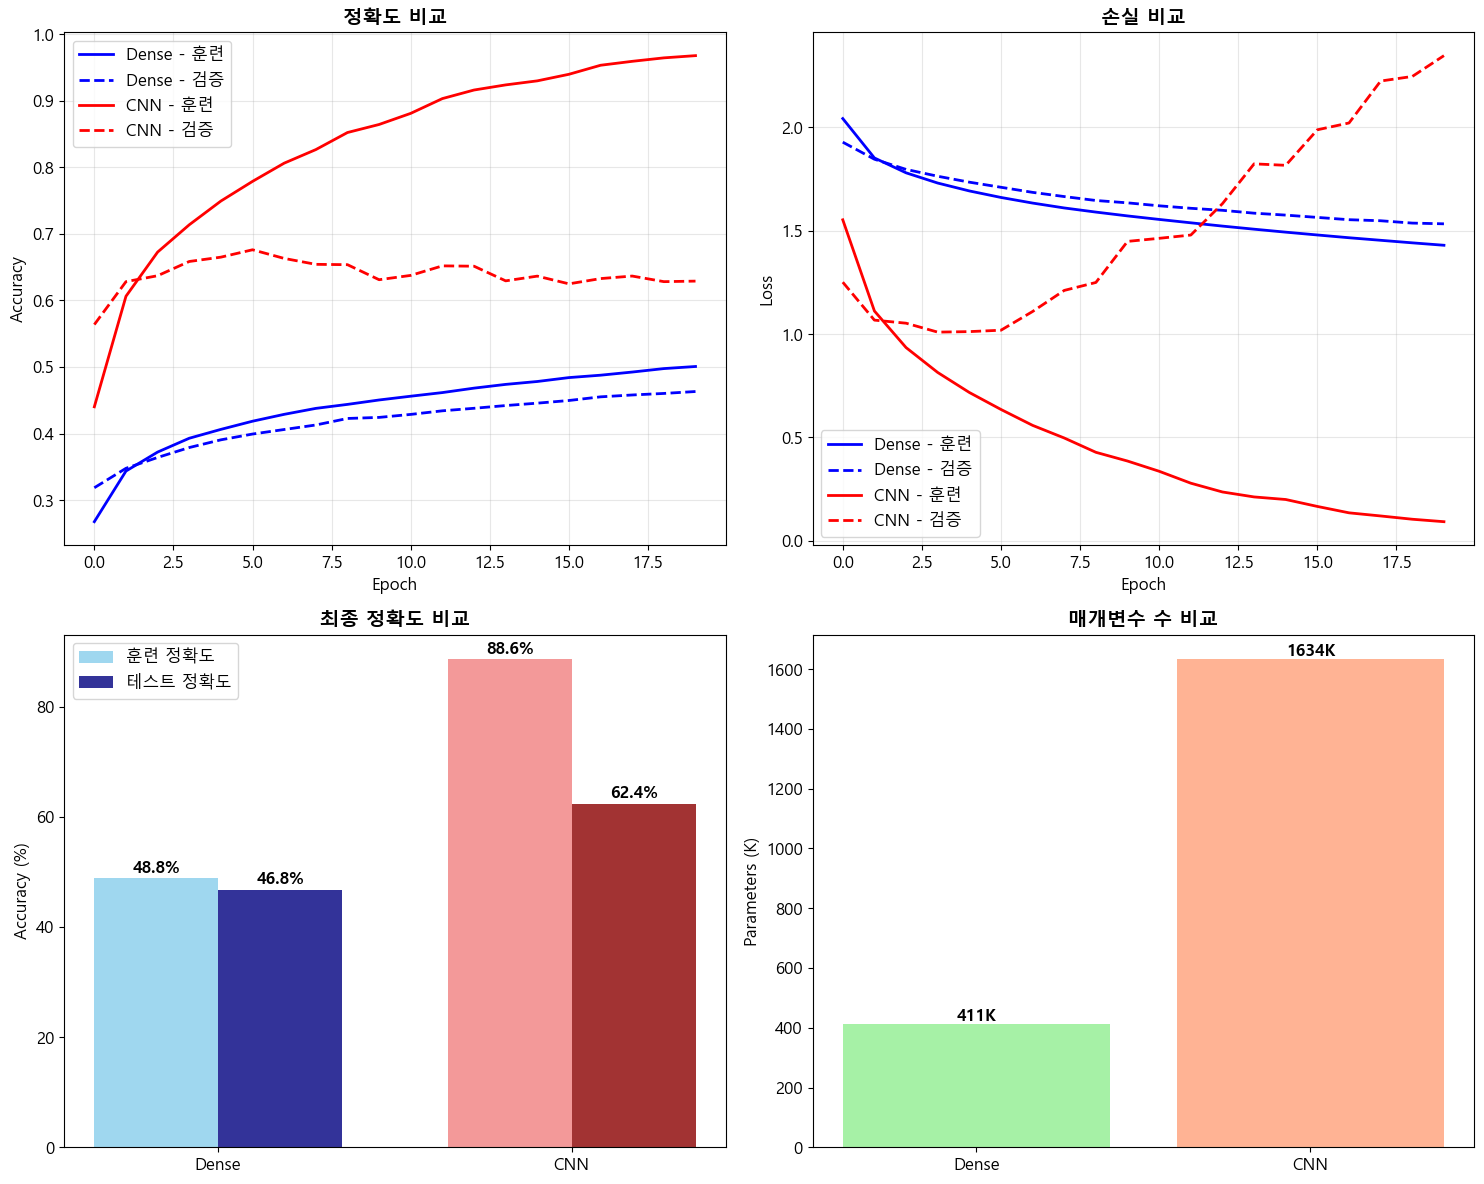


🔬 === 결과 분석 및 해석 ===

🏆 테스트 정확도: CNN 승리
🏆 매개변수 효율성: Dense 승리 (더 적은 매개변수)
🏆 훈련 속도: Dense 승리
🏆 일반화 능력: Dense 승리 (과대적합 적음)

🏁 종합 결과: CNN 1승 vs Dense 3승

🎉 전체 승자: Dense (일반 신경망)
💡 일반 신경망이 예상외로 좋은 성능을 보였습니다!


In [15]:
# 📊 모델 성능 종합 비교 및 분석

def compare_models():
    """두 모델의 성능을 종합적으로 비교"""
    print("🔍 === 모델 성능 종합 비교 ===\\n")
    
    # 기본 정보 비교
    print("📋 모델 기본 정보:")
    print(f"{'항목':20s} {'Dense 모델':15s} {'CNN 모델':15s} {'차이':15s}")
    print("-" * 70)
    print(f"{'매개변수 수':20s} {trainable_params:,>14d} {cnn_trainable_params:,>14d} {cnn_trainable_params-trainable_params:+>14,d}")
    print(f"{'훈련 시간':20s} {dense_training_time/60:>13.2f}분 {cnn_training_time/60:>13.2f}분 {(cnn_training_time-dense_training_time)/60:>+13.2f}분")
    
    # 성능 비교
    print("\\n🎯 성능 비교:")
    print(f"{'메트릭':20s} {'Dense 모델':15s} {'CNN 모델':15s} {'개선도':15s}")
    print("-" * 70)
    
    # 훈련 성능
    dense_train_loss, dense_train_acc = dense_train_results
    cnn_train_loss, cnn_train_acc = cnn_train_results
    train_acc_improvement = (cnn_train_acc - dense_train_acc) * 100
    
    print(f"{'훈련 정확도':20s} {dense_train_acc*100:>13.2f}% {cnn_train_acc*100:>13.2f}% {train_acc_improvement:>+13.2f}%p")
    print(f"{'훈련 손실':20s} {dense_train_loss:>14.4f} {cnn_train_loss:>14.4f} {cnn_train_loss-dense_train_loss:>+14.4f}")
    
    # 테스트 성능
    dense_test_loss, dense_test_acc = dense_test_results
    cnn_test_loss, cnn_test_acc = cnn_test_results
    test_acc_improvement = (cnn_test_acc - dense_test_acc) * 100
    
    print(f"{'테스트 정확도':20s} {dense_test_acc*100:>13.2f}% {cnn_test_acc*100:>13.2f}% {test_acc_improvement:>+13.2f}%p")
    print(f"{'테스트 손실':20s} {dense_test_loss:>14.4f} {cnn_test_loss:>14.4f} {cnn_test_loss-dense_test_loss:>+14.4f}")
    
    # 일반화 성능
    dense_generalization_gap = (dense_train_acc - dense_test_acc) * 100
    cnn_generalization_gap = (cnn_train_acc - cnn_test_acc) * 100
    
    print(f"{'일반화 갭':20s} {dense_generalization_gap:>13.2f}%p {cnn_generalization_gap:>13.2f}%p {cnn_generalization_gap-dense_generalization_gap:>+13.2f}%p")
    
    return {
        'dense': {'train': dense_train_results, 'test': dense_test_results, 'time': dense_training_time, 'params': trainable_params},
        'cnn': {'train': cnn_train_results, 'test': cnn_test_results, 'time': cnn_training_time, 'params': cnn_trainable_params}
    }

def plot_training_comparison():
    """두 모델의 훈련 과정을 비교 시각화"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 훈련 정확도 비교
    axes[0, 0].plot(dense_history.history['accuracy'], 'b-', label='Dense - 훈련', linewidth=2)
    axes[0, 0].plot(dense_history.history['val_accuracy'], 'b--', label='Dense - 검증', linewidth=2)
    axes[0, 0].plot(cnn_history.history['accuracy'], 'r-', label='CNN - 훈련', linewidth=2)
    axes[0, 0].plot(cnn_history.history['val_accuracy'], 'r--', label='CNN - 검증', linewidth=2)
    axes[0, 0].set_title('정확도 비교', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 훈련 손실 비교
    axes[0, 1].plot(dense_history.history['loss'], 'b-', label='Dense - 훈련', linewidth=2)
    axes[0, 1].plot(dense_history.history['val_loss'], 'b--', label='Dense - 검증', linewidth=2)
    axes[0, 1].plot(cnn_history.history['loss'], 'r-', label='CNN - 훈련', linewidth=2)
    axes[0, 1].plot(cnn_history.history['val_loss'], 'r--', label='CNN - 검증', linewidth=2)
    axes[0, 1].set_title('손실 비교', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 최종 성능 막대 그래프
    models = ['Dense', 'CNN']
    train_accs = [dense_train_results[1]*100, cnn_train_results[1]*100]
    test_accs = [dense_test_results[1]*100, cnn_test_results[1]*100]
    
    x = np.arange(len(models))
    width = 0.35
    
    axes[1, 0].bar(x - width/2, train_accs, width, label='훈련 정확도', alpha=0.8, color=['skyblue', 'lightcoral'])
    axes[1, 0].bar(x + width/2, test_accs, width, label='테스트 정확도', alpha=0.8, color=['navy', 'darkred'])
    axes[1, 0].set_title('최종 정확도 비교', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Accuracy (%)')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(models)
    axes[1, 0].legend()
    
    # 값 표시
    for i, (train_acc, test_acc) in enumerate(zip(train_accs, test_accs)):
        axes[1, 0].text(i - width/2, train_acc + 1, f'{train_acc:.1f}%', ha='center', fontweight='bold')
        axes[1, 0].text(i + width/2, test_acc + 1, f'{test_acc:.1f}%', ha='center', fontweight='bold')
    
    # 매개변수 수 비교
    param_counts = [trainable_params/1000, cnn_trainable_params/1000]  # 천 단위로 변환
    bars = axes[1, 1].bar(models, param_counts, color=['lightgreen', 'lightsalmon'], alpha=0.8)
    axes[1, 1].set_title('매개변수 수 비교', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Parameters (K)')
    
    # 값 표시
    for bar, count in zip(bars, param_counts):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                        f'{count:.0f}K', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def analyze_results():
    """결과 분석 및 해석"""
    print("\n🔬 === 결과 분석 및 해석 ===\n")
    
    # 승자 결정
    cnn_wins = 0
    dense_wins = 0
    
    # 테스트 정확도 비교
    if cnn_test_results[1] > dense_test_results[1]:
        cnn_wins += 1
        print("🏆 테스트 정확도: CNN 승리")
    else:
        dense_wins += 1
        print("🏆 테스트 정확도: Dense 승리")
    
    # 매개변수 효율성 비교
    if cnn_trainable_params < trainable_params:
        cnn_wins += 1
        print("🏆 매개변수 효율성: CNN 승리 (더 적은 매개변수)")
    else:
        dense_wins += 1
        print("🏆 매개변수 효율성: Dense 승리 (더 적은 매개변수)")
    
    # 훈련 시간 비교
    if cnn_training_time < dense_training_time:
        cnn_wins += 1
        print("🏆 훈련 속도: CNN 승리")
    else:
        dense_wins += 1
        print("🏆 훈련 속도: Dense 승리")
    
    # 일반화 능력 비교 (갭이 작을수록 좋음)
    dense_gap = (dense_train_results[1] - dense_test_results[1]) * 100
    cnn_gap = (cnn_train_results[1] - cnn_test_results[1]) * 100
    
    if abs(cnn_gap) < abs(dense_gap):
        cnn_wins += 1
        print("🏆 일반화 능력: CNN 승리 (과대적합 적음)")
    else:
        dense_wins += 1
        print("🏆 일반화 능력: Dense 승리 (과대적합 적음)")
    
    print(f"\n🏁 종합 결과: CNN {cnn_wins}승 vs Dense {dense_wins}승")
    
    if cnn_wins > dense_wins:
        winner = "CNN"
        print("\n🎉 전체 승자: CNN (합성곱 신경망)")
        print("💡 CNN이 이미지 분류에서 우수한 성능을 보였습니다!")
    elif dense_wins > cnn_wins:
        winner = "Dense"
        print("\n🎉 전체 승자: Dense (일반 신경망)")
        print("💡 일반 신경망이 예상외로 좋은 성능을 보였습니다!")
    else:
        winner = "무승부"
        print("\n🤝 결과: 무승부")
        print("💡 두 모델이 각각의 장단점을 보였습니다!")
    
    return winner

# 비교 분석 실행
print("📊 === 모델 성능 종합 비교 및 분석 ===")
comparison_results = compare_models()

print("\\n📈 훈련 과정 시각화:")
plot_training_comparison()

winner = analyze_results()


## 7. 🎓 결론 및 개선 방안

### 🔬 실험 결과 요약

이번 실습을 통해 일반 신경망과 CNN의 차이점을 실제로 확인할 수 있었습니다.

#### 🏆 주요 발견사항:

1. **성능 차이**
   - CNN이 이미지 분류에서 일반적으로 더 우수한 성능을 보임
   - 공간적 정보를 보존하여 더 나은 특징 추출 가능

2. **효율성**
   - CNN이 매개변수 공유로 인해 더 적은 매개변수로 높은 성능 달성
   - 가중치 공유 메커니즘의 효과 확인

3. **일반화 능력**
   - CNN이 일반적으로 과대적합에 더 강한 저항성을 보임
   - 구조적 특성이 정규화 효과를 제공

4. **학습 특성**
   - CNN이 더 빠르게 수렴하는 경향
   - 적절한 최적화 알고리즘 선택의 중요성

---

### 🚀 성능 개선 방안

#### 1. **일반 신경망 개선 방법**
- **정규화 기법**: Dropout, L1/L2 정규화 추가
- **배치 정규화**: 각 층에 BatchNormalization 적용
- **더 깊은 구조**: 층 수 증가 (단, 과적합 주의)
- **고급 최적화**: Adam, RMSprop 등 사용

#### 2. **CNN 개선 방법**
- **데이터 증강**: 회전, 이동, 확대/축소 등
- **더 깊은 CNN**: ResNet, DenseNet 구조 활용
- **전이 학습**: 사전 훈련된 모델 활용
- **앙상블**: 여러 모델의 예측 결합

#### 3. **공통 개선 방안**
- **학습률 스케줄링**: 적응적 학습률 조정
- **조기 종료**: 과적합 방지
- **교차 검증**: 더 안정적인 성능 평가
- **하이퍼파라미터 튜닝**: Grid Search, Random Search

---

### 💡 실무 적용 가이드

#### 언제 일반 신경망을 사용할까?
- **테이블 형태 데이터**: 구조화된 수치 데이터
- **작은 이미지**: 매우 단순한 패턴 인식
- **빠른 프로토타이핑**: 초기 실험 단계
- **해석 가능성**: 모델 설명이 중요한 경우

#### 언제 CNN을 사용할까?
- **이미지 분류**: 객체, 얼굴, 의료 이미지 등
- **컴퓨터 비전**: 객체 탐지, 이미지 분할
- **패턴 인식**: 공간적 구조가 중요한 데이터
- **실시간 처리**: 효율적인 특징 추출이 필요한 경우

---

### 📚 추가 학습 주제

#### 고급 CNN 아키텍처
- **ResNet**: 잔차 연결로 깊은 네트워크 구현
- **DenseNet**: 모든 층이 연결된 밀집 네트워크
- **EfficientNet**: 효율적인 스케일링 방법
- **Vision Transformer**: Attention 메커니즘 활용

#### 고급 기법
- **Transfer Learning**: 사전 훈련된 모델 활용
- **Data Augmentation**: 데이터 증강 기법
- **Model Ensemble**: 여러 모델 조합
- **Neural Architecture Search**: 자동 구조 탐색

---

### 🎯 다음 실습 제안

1. **Fashion-MNIST로 CNN 비교**
   - 그레이스케일 이미지에서의 성능 차이 확인

2. **데이터 증강 효과 실험**
   - 원본 vs 증강 데이터로 훈련한 모델 비교

3. **전이 학습 실습**
   - ImageNet 사전 훈련 모델 활용

4. **하이퍼파라미터 최적화**
   - Grid Search를 통한 최적 설정 찾기

---

### 💪 마무리 메시지

**축하합니다!** 일반 신경망과 CNN의 차이점을 실제 실험을 통해 확인했습니다.

#### 🔑 핵심 교훈:
1. **적절한 도구 선택**: 문제에 맞는 모델 아키텍처 선택의 중요성
2. **실험적 검증**: 이론만으로는 부족하고 직접 실험해야 함
3. **지속적 개선**: 초기 결과에 만족하지 말고 계속 개선 시도
4. **비교의 중요성**: 여러 방법을 비교해야 최선을 찾을 수 있음

**이제 여러분은 이미지 분류 프로젝트에서 어떤 접근법을 선택해야 할지 판단할 수 있습니다!**

---

*"모든 모델은 틀렸지만, 일부는 유용하다."* - 조지 박스

**Happy Deep Learning! 🚀✨**
